# Comparaciones y máscaras booleanas

Las máscaras de tipos lógicos (booleanos) permiten manipular valores en 
arrays basados en criterios sobre los propios arrays, como seleccionar
valores en un cierto rango.

Ya hemos hablado de cómo las operaciones aritméticas se implementan
como ufuncs. De la misma manera, los operadores de comparación también
son ufuncs binarios que devuelven valores lógicos.

In [1]:
import numpy as np
x = np.array([2, 3,7,1,8,2])
x > 3

array([False, False,  True, False,  True, False])

Los operadores de comparación son `>`, `>=`. `<`, `<=`, `==` y `!=`.

Cada uno tiene definida un `ufunc` equivalente. Por ejemplo `np.equal` 
o `np.less`.
Estos ufuncs funcionan igual que los aritméticos, incluyendo *broadcasting*.

In [2]:
x = np.array([[2, 3,7], [1,8,2], [1, 0, 2]])
y = np.array([1,2,3])
x < y

array([[False, False, False],
       [False, False,  True],
       [False,  True,  True]])

Igual que en una suma, aquí la comparación es por filas. Si quisiéramos comparar
por columnas, podríamos hacer

In [3]:
x < y[:, np.newaxis]

array([[False, False, False],
       [ True, False, False],
       [ True,  True,  True]])

## Usos de los arrays booleanos

Hay una buena contidad de operaciones útiles basadas en los arrays booleanos.
Una puede ser contar valores que cumplen un criterio.

In [4]:
x = np.array([[2, 3,7, 0], [1,8,2,1], [2, 1, 0, 2]])
# Contamos valores < 5
np.count_nonzero(x < 5)

10

También puede hacerse según uno de los ejes

In [5]:
print('Desaparece el eje 0, por columnas', np.count_nonzero(x < 5, axis=0))
print('Desaparece el eje 1, por filas', np.count_nonzero(x < 5, axis=1))

Desaparece el eje 0, por columnas [3 2 2 3]
Desaparece el eje 1, por filas [3 3 4]


Podemos también encontrar el valor lógico combinado de un array booleano
con las funciones `np.any` y `np.all`. `any` devuelve verdadero si hay
algun valor verdadero, mientras que `all` devuelve falso si hay algún
valor falso. Son el equivalente de reducir los arrays 
usando `or` y `and` respectivamente.

In [6]:
# ¿Son todos lo valores mayores que 2?
np.all(x > 2)

False

In [7]:
# ¿Hay algún valor menor que 1?
np.any(x < 1)

True

Aunque `any` y `all` no son ufuncs, tiene algunos de sus argumentos.
Por ejemplo, `axis` permite realizar la reducción por filas o columnas

In [8]:
# ¿hay alguna columna cuyos valores sean menores que 3?
np.all(x < 3, axis=0)

array([ True, False, False,  True])

## Operadores booleanos
Además de los operadores de comparación, numpy también tiene
operadores lógicos bit a bit, que también son ufuncs. No se utiliza
para ellos `and`, `or` y `not`. En su lugar se utilizan operadores los 
`&` (and), `|` (or), `^` (xor) y `~` (not), con sus correspondientes unfuncs
(`np.bitwise_and`, `np.bitwise_or`, etc).

Para ver su uso, vamos a trabajar con una imagen de la nebulosaa 
Cabeza de caballo.

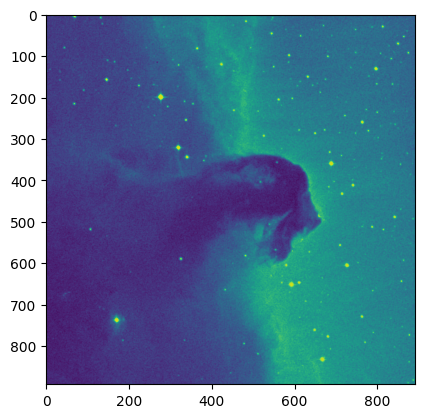

In [9]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import matplotlib.pyplot as plt

image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
image_data = fits.getdata(image_file, ext=0)
plt.imshow(image_data);

La imagen es un array bidimensional. Construimos dos máscaras. La primera
`mask1` contiene los valores menores que la media mas 3 veces la desviación
típica Y los valores mayores que la media menos tres vece la desviación típica.

La máscara `mask2` es la negación de la anterior, así que contiene
los valores por encima de 3 veces la desviación tipica sobre la media y 
por debajo de -3 veces.

Una máscara puede utilizarse no solo para listar los valores que cumplen el
criterio, sino también para asignar valores. En este caso. asignamos el valor
medio de la imagen a los valores más extremos.

9831.481676287574 3032.3927542049046


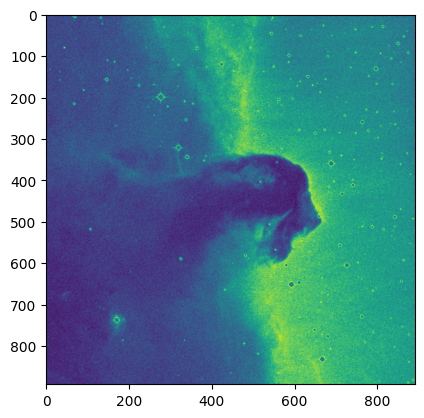

In [10]:
mean = image_data.mean()
std = image_data.std()
print(mean, std)
mask1 = (image_data < mean + 3*std) & (image_data > mean - 3 *std)
mask2 = ~mask1
image_data[mask2] = mean
plt.imshow(image_data);

Como podemos ver, esto hace desaparecer muchas de las estrellas (que 
eran valores positivos extremos).